<a href="https://colab.research.google.com/github/Daimond92/python_data_science/blob/develop/Clasificacion_primeros_pasos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación: Primeros pasos**

En este proyecto, analizaremos datos de una campaña de marketing para la adhesión a inversiones. El objetivo es utilizar la información de los datos para predecir si los clientes de un banco invertirán su dinero o no.  

Esta predicción se realizará mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

# Importaciones

In [59]:
import pandas as pd
import plotly.express as px
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from  sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import pickle

# 1. Análisis exploratorio

## Realizando la lectura de los datos

Podemos leer los datos utilizando la biblioteca `pandas`. Por esta razón, importaremos la biblioteca con el comando `import pandas as pd`.  

Dado que el archivo de datos está en formato *csv*, realizaremos la lectura con la función [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

* Pandas 1.5.3
* Plotly 5.15.0
* Matplotlib 3.7.1
* Scikit-Learn 1.2.2

In [2]:
archivo = 'https://raw.githubusercontent.com/Daimond92/python_data_science/refs/heads/develop/Data/marketing_inversiones.csv'

In [3]:
datos = pd.read_csv(archivo)

In [ ]:
datos.head()

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si


Para crear modelos de clasificación, necesitamos utilizar datos de calidad, sin inconsistencias y sin datos faltantes. Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  1268 non-null   int64 
 1   estado_civil          1268 non-null   object
 2   escolaridad           1268 non-null   object
 3   default               1268 non-null   object
 4   saldo                 1268 non-null   int64 
 5   prestatario           1268 non-null   object
 6   ultimo_contacto       1268 non-null   int64 
 7   ct_contactos          1268 non-null   int64 
 8   adherencia_inversion  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando los datos

Una etapa muy importante en proyectos de *machine learning* es la exploración y comprensión de los datos, conocida como **análisis exploratorio**. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

### Variables categóricas

In [ ]:
px.histogram(datos, x='adherencia_inversion', text_auto=True)

In [ ]:
px.histogram(datos, x='estado_civil', text_auto=True, color='adherencia_inversion', barmode='group')

In [ ]:
px.histogram(datos, x='escolaridad', text_auto=True, color='adherencia_inversion', barmode='group')

In [ ]:
px.histogram(datos, x='default', text_auto=True, color='adherencia_inversion', barmode='group')

In [ ]:
px.histogram(datos, x='prestatario', text_auto=True, color='adherencia_inversion', barmode='group')

### Variables numéricas

In [ ]:
px.box(datos, x='edad', color='adherencia_inversion')

In [ ]:
px.box(datos, x='saldo', color='adherencia_inversion')

In [ ]:
px.box(datos, x='ultimo_contacto', color='adherencia_inversion')

In [ ]:
px.box(datos, x='ct_contactos', color='adherencia_inversion')

# 2. Tranformación de los datos

## Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir, mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [ ]:
datos

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


In [4]:
X = datos.drop('adherencia_inversion', axis=1)
y = datos['adherencia_inversion']

In [ ]:
X

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,casado (a),superior,no,242,no,587,1
1,42,casado (a),secundaria,no,1289,no,250,4
2,23,soltero (a),superior,no,363,no,16,18
3,58,divorciado (a),superior,no,1382,no,700,1
4,50,casado (a),secundaria,no,3357,no,239,4
...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6
1264,35,soltero (a),superior,no,5958,no,215,1
1265,30,soltero (a),superior,no,-477,si,1532,2
1266,42,casado (a),superior,no,2187,no,525,3


In [ ]:
y

,adherencia_inversion
0,si
1,si
2,no
3,si
4,si
...,...
1263,si
1264,si
1265,si
1266,si


In [ ]:
type(y)

pandas.core.series.Series

## Transformando las variables explicativas

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

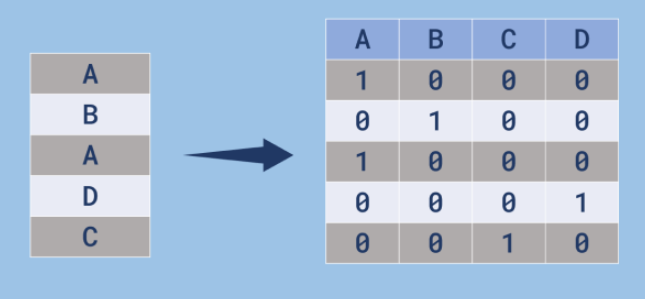

In [5]:
columnas = X.columns

In [6]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),['estado_civil', 'escolaridad',
                                                                   'default', 'prestatario']),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False
                                  )

In [7]:
X = one_hot.fit_transform(X)

In [ ]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_soltero (a)',
       'onehotencoder__escolaridad_primaria',
       'onehotencoder__escolaridad_secundaria',
       'onehotencoder__escolaridad_superior', 'onehotencoder__default_si',
       'onehotencoder__prestatario_si', 'remainder__edad',
       'remainder__saldo', 'remainder__ultimo_contacto',
       'remainder__ct_contactos'], dtype=object)

In [ ]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_soltero (a),onehotencoder__escolaridad_primaria,onehotencoder__escolaridad_secundaria,onehotencoder__escolaridad_superior,onehotencoder__default_si,onehotencoder__prestatario_si,remainder__edad,remainder__saldo,remainder__ultimo_contacto,remainder__ct_contactos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [8]:
label_encoder = LabelEncoder()

In [9]:
y = label_encoder.fit_transform(y)

In [ ]:
y

array([1, 1, 0, ..., 1, 1, 1])

# 3 Ajustando modelos

## Dividiendo los datos entre entrenamiento y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, necesitamos hacer una separación de los datos entre entrenamiento y prueba. Los datos de **entrenamiento** se utilizan para ajustar el modelo, mientras que los datos de **prueba** sirven para verificar el aprendizaje del modelo en datos que no fueron utilizados en el momento del ajuste.

<a href="https://ibb.co/2749Chh3"><img src="https://i.ibb.co/Y7sC1QQB/train-test.png" alt="train-test" border="0"></a>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## Modelo de referencia - Baseline

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [11]:
dummy = DummyClassifier()

In [57]:
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.6056782334384858

## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

In [22]:
modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [23]:
modelo_arbol.score(X_test, y_test)

0.6656151419558359

```python
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']
```

In [16]:
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']

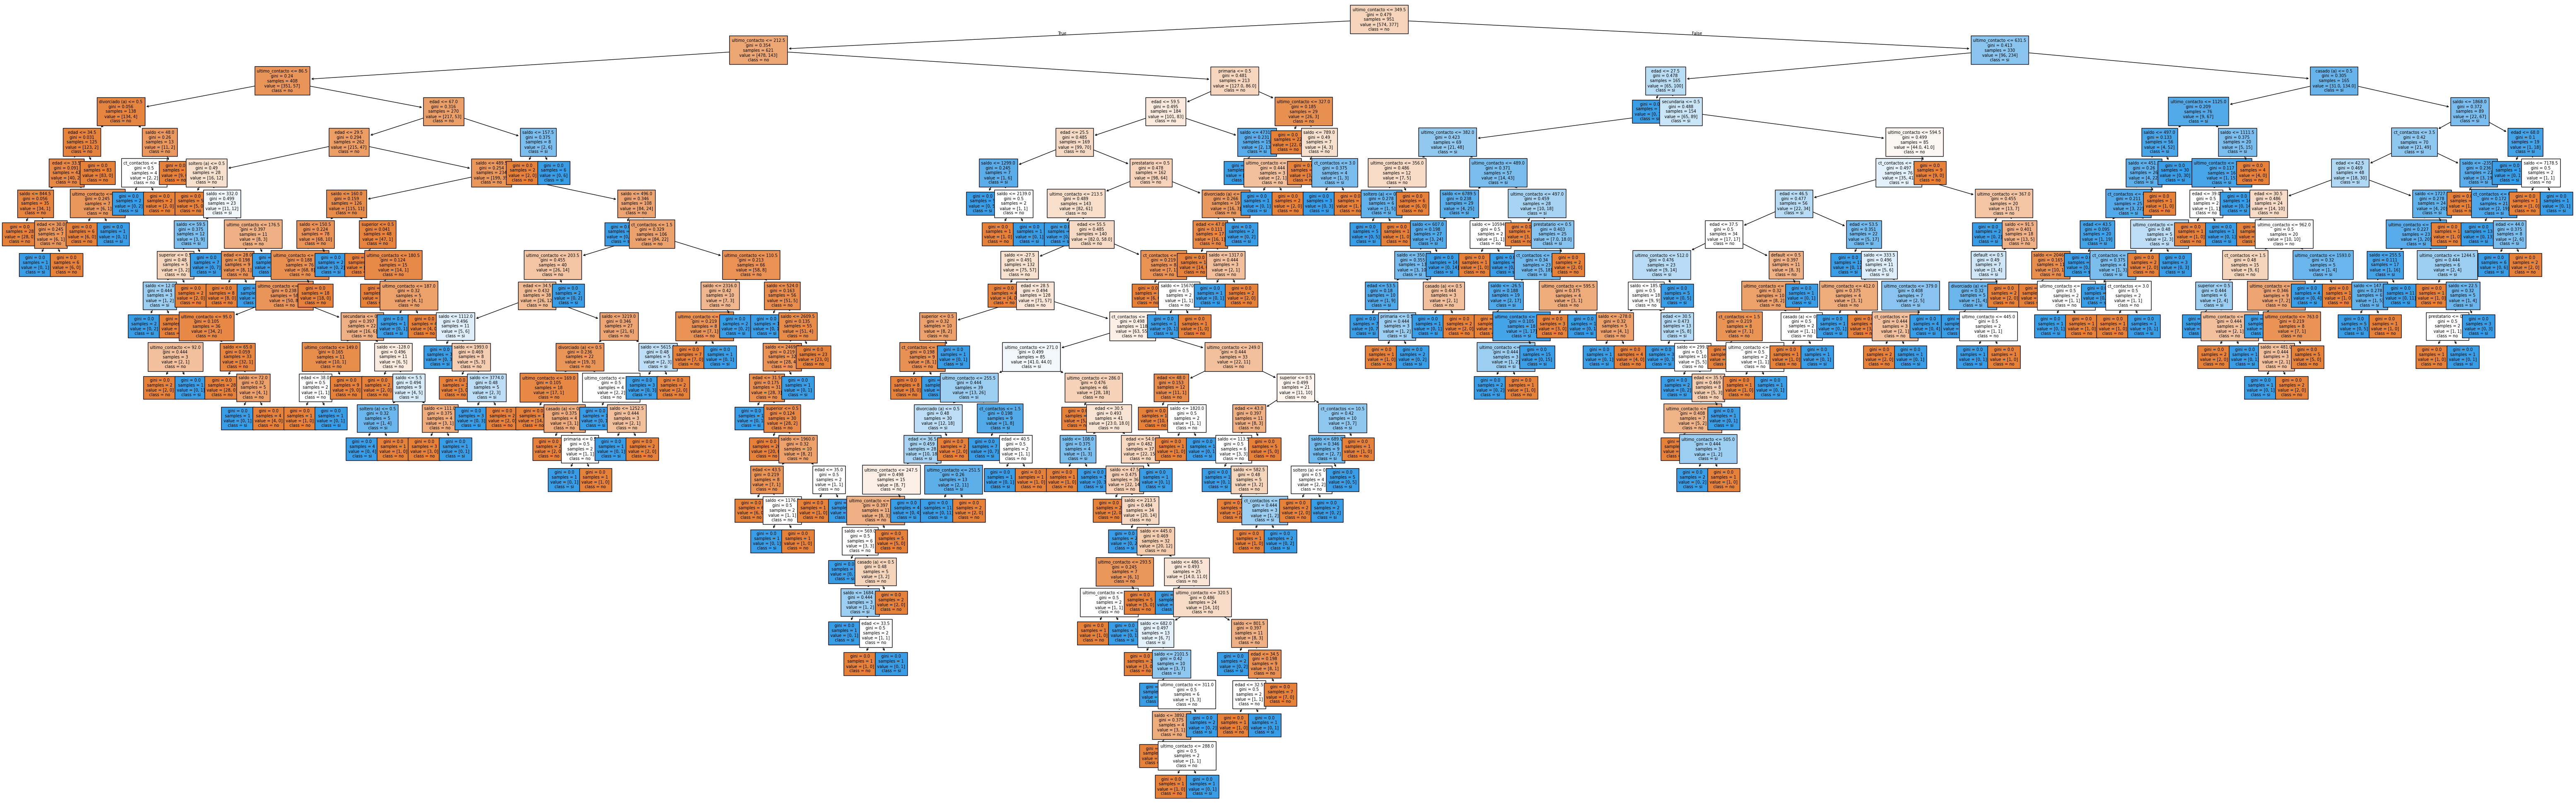

In [24]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol, filled=True, class_names=['no', 'si'], fontsize=7, feature_names=valores_columnas);

In [18]:
modelo_arbol.score(X_train, y_train)

1.0

In [25]:
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [26]:
modelo_arbol.score(X_test, y_test)

0.7129337539432177

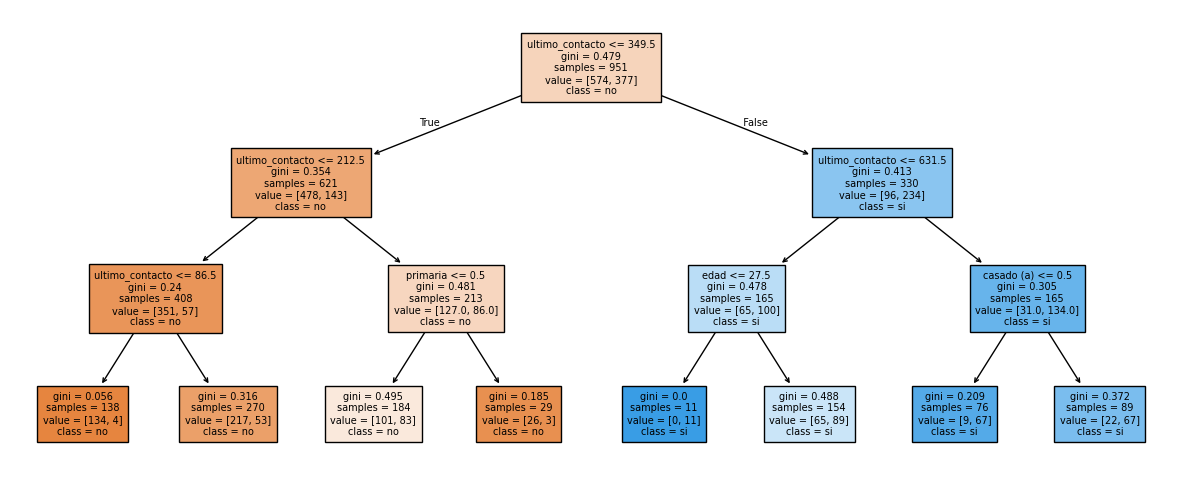

In [28]:
plt.figure(figsize=(15,6))
plot_tree(modelo_arbol, filled=True, class_names=['no', 'si'], fontsize=7, feature_names=valores_columnas);

In [29]:
modelo_arbol.score(X_train, y_train)

0.7486855941114616

# 4. Selección de modelos

## Normalizando los datos

Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas **edad** y **salario**, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [49]:
normalizador = MinMaxScaler()
X_train_normalizada = normalizador.fit_transform(X_train)

In [50]:
pd.DataFrame(X_train_normalizada)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.461538,0.062563,0.056802,0.064516
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.230769,0.054311,0.081766,0.000000
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.338462,0.120074,0.092619,0.000000
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.123077,0.086224,0.096961,0.000000
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.092308,0.040586,0.215268,0.096774
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.123077,0.043238,0.017728,0.032258
947,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.230769,0.051111,0.059334,0.096774
948,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.292308,0.042523,0.019899,0.000000
949,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.307692,0.050901,0.174747,0.000000


## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [52]:
knn = KNeighborsClassifier()

In [53]:
knn.fit(X_train_normalizada, y_train)

KNeighborsClassifier()

In [54]:
X_test_normalizada = normalizador.transform(X_test)

In [55]:
knn.score(X_test_normalizada, y_test)

0.6971608832807571

## Escogiendo y serializando el mejor modelo

Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

In [58]:
lista = [('dummy', dummy, X_test), ('de árbol', modelo_arbol, X_test), ('knn', knn, X_test_normalizada)]

for i in lista:
  print(f'La exactitud del modelo {i[0]} es: {i[1].score(i[2], y_test)}')

La exactitud del modelo dummy es: 0.6056782334384858
La exactitud del modelo de árbol es: 0.7129337539432177
La exactitud del modelo knn es: 0.6971608832807571


## Exportar modelo

In [60]:
 with open('Modelo_one_hot_encoder.pkl', 'wb') as archivo:
  pickle.dump(one_hot, archivo)

In [61]:
 with open('Modelo_champion.pkl', 'wb') as archivo:
  pickle.dump(modelo_arbol, archivo)

```python
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}
```

In [62]:
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}

In [63]:
nuevo_dato = pd.DataFrame(nuevo_dato)
nuevo_dato

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,soltero (a),superior,no,23040,no,800,4


In [64]:
modelo_one_hot = pd.read_pickle('/content/Modelo_one_hot_encoder.pkl')
modelo_arbol = pd.read_pickle('/content/Modelo_champion.pkl')

In [67]:
modelo_arbol.predict(nuevo_dato)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'soltero (a)'

In [66]:
modelo_arbol.predict(modelo_one_hot.transform(nuevo_dato))

array([1])

# Ejercicios

## Parte 1


1. La primera etapa en un proyecto de Machine Learning es la obtención de datos. A partir de esta obtención, podemos leer los datos para construir un modelo. Como tarea inicial, realiza la lectura de la base de datos y verifica la presencia de datos nulos. Además, elimina la columna 'id_cliente', ya que este tipo de información única para cada fila no es útil para su uso en modelos de machine learning.


In [30]:
archivo2 = 'https://raw.githubusercontent.com/Daimond92/python_data_science/refs/heads/develop/Data/churn.csv'

In [31]:
datos2 = pd.read_csv(archivo2)

In [32]:
datos2.drop('id_cliente', axis=1, inplace=True)

In [ ]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   score_credito          10000 non-null  int64  
 1   pais                   10000 non-null  object 
 2   sexo_biologico         10000 non-null  object 
 3   edad                   10000 non-null  int64  
 4   años_de_cliente        10000 non-null  int64  
 5   saldo                  10000 non-null  float64
 6   servicios_adquiridos   10000 non-null  int64  
 7   tiene_tarjeta_credito  10000 non-null  int64  
 8   miembro_activo         10000 non-null  int64  
 9   salario_estimado       10000 non-null  float64
 10  churn                  10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
datos2.head()

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0



2. Después de leer los datos, es importante conocer los datos, revisando inconsistencias y entendiendo el comportamiento de cada una de las columnas. En esta tarea, realiza un análisis exploratorio utilizando gráficos para las variables categóricas de la base de datos, incluyendo la variable objetivo churn. Para estas variables, se pueden utilizar gráficos de barras para contar las categorías y hacer un agrupamiento por colores de acuerdo con las categorías de la variable objetivo.

In [ ]:
px.histogram(datos2, x = 'churn', text_auto = True)

In [ ]:
px.histogram(datos2, x = 'pais', text_auto = True, color = 'churn', barmode = 'group')

In [ ]:
px.histogram(datos2, x = 'sexo_biologico', text_auto = True, color = 'churn', barmode = 'group')

In [ ]:
px.histogram(datos2, x = 'tiene_tarjeta_credito', text_auto = True, color = 'churn', barmode = 'group')

In [ ]:
px.histogram(datos2, x = 'miembro_activo', text_auto = True, color = 'churn', barmode = 'group')


3. Después de explorar las variables categóricas, es el turno de las variables numéricas. Construye gráficos de distribución como boxplots o histogramas para analizar el comportamiento de los valores numéricos y verificar si hay valores inconsistentes.

In [ ]:
px.box(datos2, x = 'score_credito', color = 'churn')

In [ ]:
px.box(datos2, x = 'edad', color = 'churn')

In [ ]:
px.box(datos2, x = 'años_de_cliente', color = 'churn')

In [ ]:
px.box(datos2, x = 'saldo', color = 'churn')

In [ ]:
px.box(datos2, x = 'servicios_adquiridos', color = 'churn')

In [ ]:
px.box(datos2, x = 'salario_estimado', color = 'churn')

## Parte 2

1. Para utilizar los datos en los algoritmos de Machine Learning, necesitamos informar cuáles son las variables explicativas y cuál es la variable objetivo. En este desafío, realiza la separación de la base de datos de churn entre las variables explicativas, almacenando en una variable x y la variable objetivo en y.


In [33]:
x_1 = datos2.drop('churn', axis = 1)
y_1 = datos2['churn']

2. Las variables categóricas que están en formato de texto no pueden ser utilizadas directamente en los modelos de Machine Learning. En este desafío, realiza la transformación de las variables categóricas al formato numérico utilizando el OneHotEncoder, utilizando el parámetro drop='if_binary' si alguna variable tiene solo 2 categorías.


In [34]:
one_hot_1 = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['sexo_biologico','pais', 'tiene_tarjeta_credito', 'miembro_activo']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [35]:
columnas_1 = x_1.columns

In [36]:
x_1 = one_hot_1.fit_transform(x_1)

In [ ]:
one_hot_1.get_feature_names_out(columnas_1)

array(['onehotencoder__sexo_biologico_Mujer',
       'onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__tiene_tarjeta_credito_1',
       'onehotencoder__miembro_activo_1', 'remainder__score_credito',
       'remainder__edad', 'remainder__años_de_cliente',
       'remainder__saldo', 'remainder__servicios_adquiridos',
       'remainder__salario_estimado'], dtype=object)

In [ ]:
pd.DataFrame(x_1, columns = one_hot_1.get_feature_names_out(columnas_1))

,onehotencoder__sexo_biologico_Mujer,onehotencoder__pais_Alemania,onehotencoder__pais_España,onehotencoder__pais_Francia,onehotencoder__tiene_tarjeta_credito_1,onehotencoder__miembro_activo_1,remainder__score_credito,remainder__edad,remainder__años_de_cliente,remainder__saldo,remainder__servicios_adquiridos,remainder__salario_estimado
0,1.0,0.0,0.0,1.0,1.0,1.0,619.0,42.0,2.0,0.00,1.0,101348.88
1,1.0,0.0,1.0,0.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,112542.58
2,1.0,0.0,0.0,1.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,113931.57
3,1.0,0.0,0.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,93826.63
4,1.0,0.0,1.0,0.0,1.0,1.0,850.0,43.0,2.0,125510.82,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,1.0,1.0,0.0,771.0,39.0,5.0,0.00,2.0,96270.64
9996,0.0,0.0,0.0,1.0,1.0,1.0,516.0,35.0,10.0,57369.61,1.0,101699.77
9997,1.0,0.0,0.0,1.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,42085.58
9998,0.0,1.0,0.0,0.0,1.0,0.0,772.0,42.0,3.0,75075.31,2.0,92888.52


3. La variable objetivo, como es de tipo categórica, también necesita pasar por un tratamiento similar al de las variables explicativas categóricas para que pueda ser utilizada en los algoritmos. En esta tarea, utiliza el método LabelEncoder para realizar la transformación de la variable churn.

In [37]:
label_encoder_1 = LabelEncoder()

In [38]:
y_1 = label_encoder_1.fit_transform(y_1)

## Parte 3

1. La separación de los datos entre conjunto de entrenamiento y prueba es esencial para comprender si un modelo está logrando aprender los patrones y generalizar a nuevos datos. En esta tarea, realiza la división de la base de datos entre entrenamiento y prueba de forma estratificada.

In [39]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, stratify = y_1,  random_state = 5)

2. Un modelo base es muy importante para definir un criterio de comparación para modelos más complejos. En esta etapa, crea un modelo base con el DummyClassifier y encuentra la tasa de acierto con el método score.

In [41]:
dummy_1 = DummyClassifier()
dummy_1.fit(x_train_1, y_train_1)

dummy_1.score(x_test_1, y_test_1)

0.7964

3. El árbol de decisión es un algoritmo que realiza las clasificaciones a partir de decisiones simples tomadas a partir de los datos. Debemos tener cierto cuidado de no utilizar una profundidad muy grande, porque esto puede provocar un sobreajuste del modelo a los datos de entrenamiento. En este desafío, crea un modelo de árbol de decisión con el parámetro max_depth=4, evalúa el desempeño del modelo en los datos de prueba y visualiza las decisiones del árbol usando el método plot_tree.

In [43]:
arbol_1 = DecisionTreeClassifier(max_depth = 4, random_state =5)
arbol_1.fit(x_train_1, y_train_1)

arbol_1.score(x_test_1, y_test_1)

0.8464

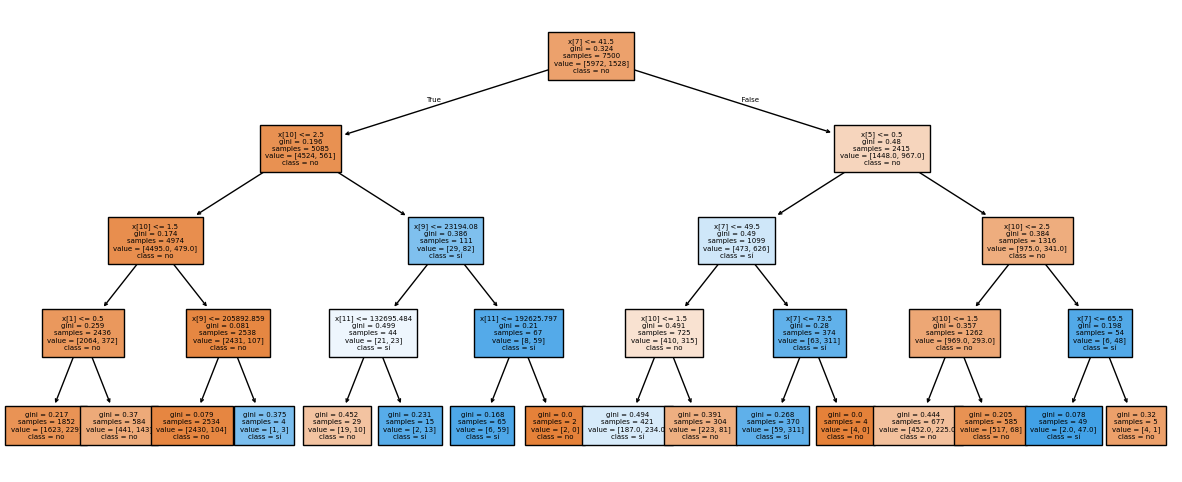

In [47]:
plt.figure(figsize = (15, 6))
plot_tree(arbol_1, filled = True, class_names = ['no', 'sí'], fontsize = 5);

## Parte 4

1. La normalización de datos es una tarea importante para mantener todos los valores numéricos en una misma escala y garantizar que todas las características tengan el mismo impacto en el modelo. En esta tarea, realiza la normalización de la base de datos usando el MinMaxScaler.

In [68]:
normalizacion = MinMaxScaler()
x_entrenamiento_normalizado = normalizacion.fit_transform(x_test_1)

In [69]:
pd.DataFrame(x_entrenamiento_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,1.0,1.0,0.418,0.324324,0.7,0.000000,0.333333,0.950338
1,0.0,0.0,0.0,1.0,1.0,1.0,0.304,0.202703,0.8,0.000000,0.333333,0.617613
2,1.0,1.0,0.0,0.0,0.0,1.0,0.870,0.243243,0.2,0.397798,0.000000,0.184862
3,0.0,0.0,1.0,0.0,0.0,0.0,0.132,0.229730,0.8,0.000000,0.000000,0.598628
4,1.0,1.0,0.0,0.0,1.0,0.0,0.602,0.094595,0.2,0.435137,0.333333,0.572891
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.0,0.0,0.0,1.0,1.0,1.0,0.884,0.702703,0.3,0.000000,0.333333,0.861319
2496,1.0,1.0,0.0,0.0,1.0,1.0,0.600,0.229730,0.3,0.661553,0.333333,0.122378
2497,1.0,0.0,0.0,1.0,1.0,1.0,0.922,0.229730,0.7,0.000000,0.000000,0.000833
2498,0.0,0.0,0.0,1.0,1.0,1.0,0.754,0.216216,1.0,0.000000,0.333333,0.993332


2. Con los datos normalizados, podemos utilizar el modelo KNN, que hace cálculos de distancia para encontrar los vecinos más cercanos. En esta actividad, crea un modelo KNN usando el KNeighborsClassifier con los datos normalizados y evalúa el rendimiento en los datos de prueba, también normalizados.

In [70]:
knn = KNeighborsClassifier()
knn.fit(x_entrenamiento_normalizado, y_test_1)

x_test_normalizado = normalizacion.transform(x_test_1)

knn.score(x_test_normalizado, y_test_1)

0.8568

3. Después de construir los modelos, es el momento de comparar los resultados y seleccionar aquel que tiene el mejor rendimiento. En este desafío, evalúa la tasa de acierto de los modelos DummyClassifier, DecisionTreeClassifier y KNeighborsClassifier que fueron construidos en los otros desafíos utilizando el método score y, a continuación, almacena el modelo con mejor precisión en un archivo pickle. Los modelos de transformación también necesitan ser almacenados, que es el caso del OneHotEncoder y del MinMaxScaler, en caso de que el KNN tenga el mejor rendimiento.

In [72]:
print(f'Exactitud Dummy: {dummy_1.score(x_test_1, y_test_1)}')
print(f'Exactitud Árbol: {arbol_1.score(x_test_1, y_test_1)}')
print(f'Exactitud KNN: {knn.score(x_test_normalizado, y_test_1)}')

Exactitud Dummy: 0.7964
Exactitud Árbol: 0.8464
Exactitud KNN: 0.8568


In [73]:
with open('modelo_onehotenc.pkl', 'wb') as archivo:
    pickle.dump(one_hot_1, archivo)

In [75]:
with open('modelo_knn.pkl', 'wb') as archivo:
    pickle.dump(knn, archivo)

4. Después de que el modelo está en producción, ya puede ser utilizado para clasificar nuevos datos. En este desafío, realiza la lectura de los archivos pickle de los modelos que fueron guardados en el desafío anterior y utiliza los modelos para hacer la predicción del siguiente registro:

```python
nuevo_dato = pd.DataFrame({
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'años_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro _activo': [1],
    'salario_estimado': [85270.00]
})
```

In [85]:
nuevo_dato_1 = pd.DataFrame({
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'años_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro_activo': [1],
    'salario_estimado': [85270.00]
})

In [79]:
modelo_one_hot_1 = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_knn_1 = pd.read_pickle('/content/modelo_knn.pkl')

In [86]:
modelo_knn_1.predict(modelo_one_hot_1.transform(nuevo_dato_1))

array([0])